Here we will try to see what type of activity corelates most with low attention rates

In [1]:
#imports
#pip install pandas
import pandas as pd
#pip install numpy
import numpy as np
#standard library
import os
#standard library
import math
#python -m pip install -U matplotlib
import matplotlib.pyplot as plt
#pip install statistics
from statistics import mean

In [2]:
#this function allows to read the csv files from the logs of the attentive cursor dataset
#path_logs : path to the logs of the dataset with the files containing the list of inputs for each user
#path_csv : path to the groundtruth.csv containing the attention score of the each user
#dfs : array containing, for each user, its attention score and the count of its inputs
def get_csv_data(path_logs, path_csv):
    data = pd.read_csv(path_csv, sep='\t')
    dfs = []
    for dirname, _, filenames in os.walk(path_logs):
        for filename in filenames:
            if filename.endswith('.csv'):
                file_path = os.path.join(dirname, filename).replace('\\', '/')
                df = pd.read_csv(file_path,sep=' ')
                
                row = data.loc[data['log_id'] == int(filename[:-4])] # https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
                # print(row)
                arr = row.values.tolist()
                arr.append(df)
                dfs.append(arr)
    return dfs

In [3]:
#loading the data in dfs
dfs = get_csv_data('../the-attentive-cursor-dataset/logs', '../the-attentive-cursor-dataset/groundtruth.tsv')

In [4]:
#size of the dataset
print("size of the dataset : ",len(dfs))

size of the dataset :  2909


In [5]:
#count the number of values for each attention score
attention_scores = []
for i in range(len(dfs)):
    attention_scores.append(dfs[i][0][2])
count_attention_scores =np.bincount(attention_scores)

<BarContainer object of 6 artists>

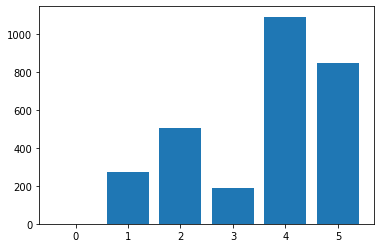

In [6]:
#bar plot of attention score
plt.bar(range(len(count_attention_scores)), count_attention_scores)

In [7]:
#keeping only the data we want in a new array (score and number of each input for each user)
cleandf = []
for row in range(len(dfs)):
    cleandf.append([dfs[row][0][2],dfs[row][1]['event'].value_counts()])

In [8]:
#create an array of the total count for each input
counting = pd.Series()
for row in range(len(cleandf)) :
    for column in cleandf[row][1].keys() :
        if counting.get(column) is None :
            counting[column] = 0
        counting[column] += cleandf[row][1][column]
print(counting)

#x is the list of all inputs
x=[]

for input in counting.keys() :
    x.append(input)


C:\Users\Eliaz\AppData\Local\Temp/ipykernel_15912/3870004937.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  counting = pd.Series()


scroll          16378
mousemove       47020
mouseover       14804
mousedown        3726
mouseup          3710
blur             2878
focus            3735
click            2892
load             2885
contextmenu        95
beforeunload     2893
unload           2854
resize             59
select            118
keydown          1796
keyup             433
touchstart         19
touchend           19
touchmove          18
copy                9
dtype: int64


<BarContainer object of 20 artists>

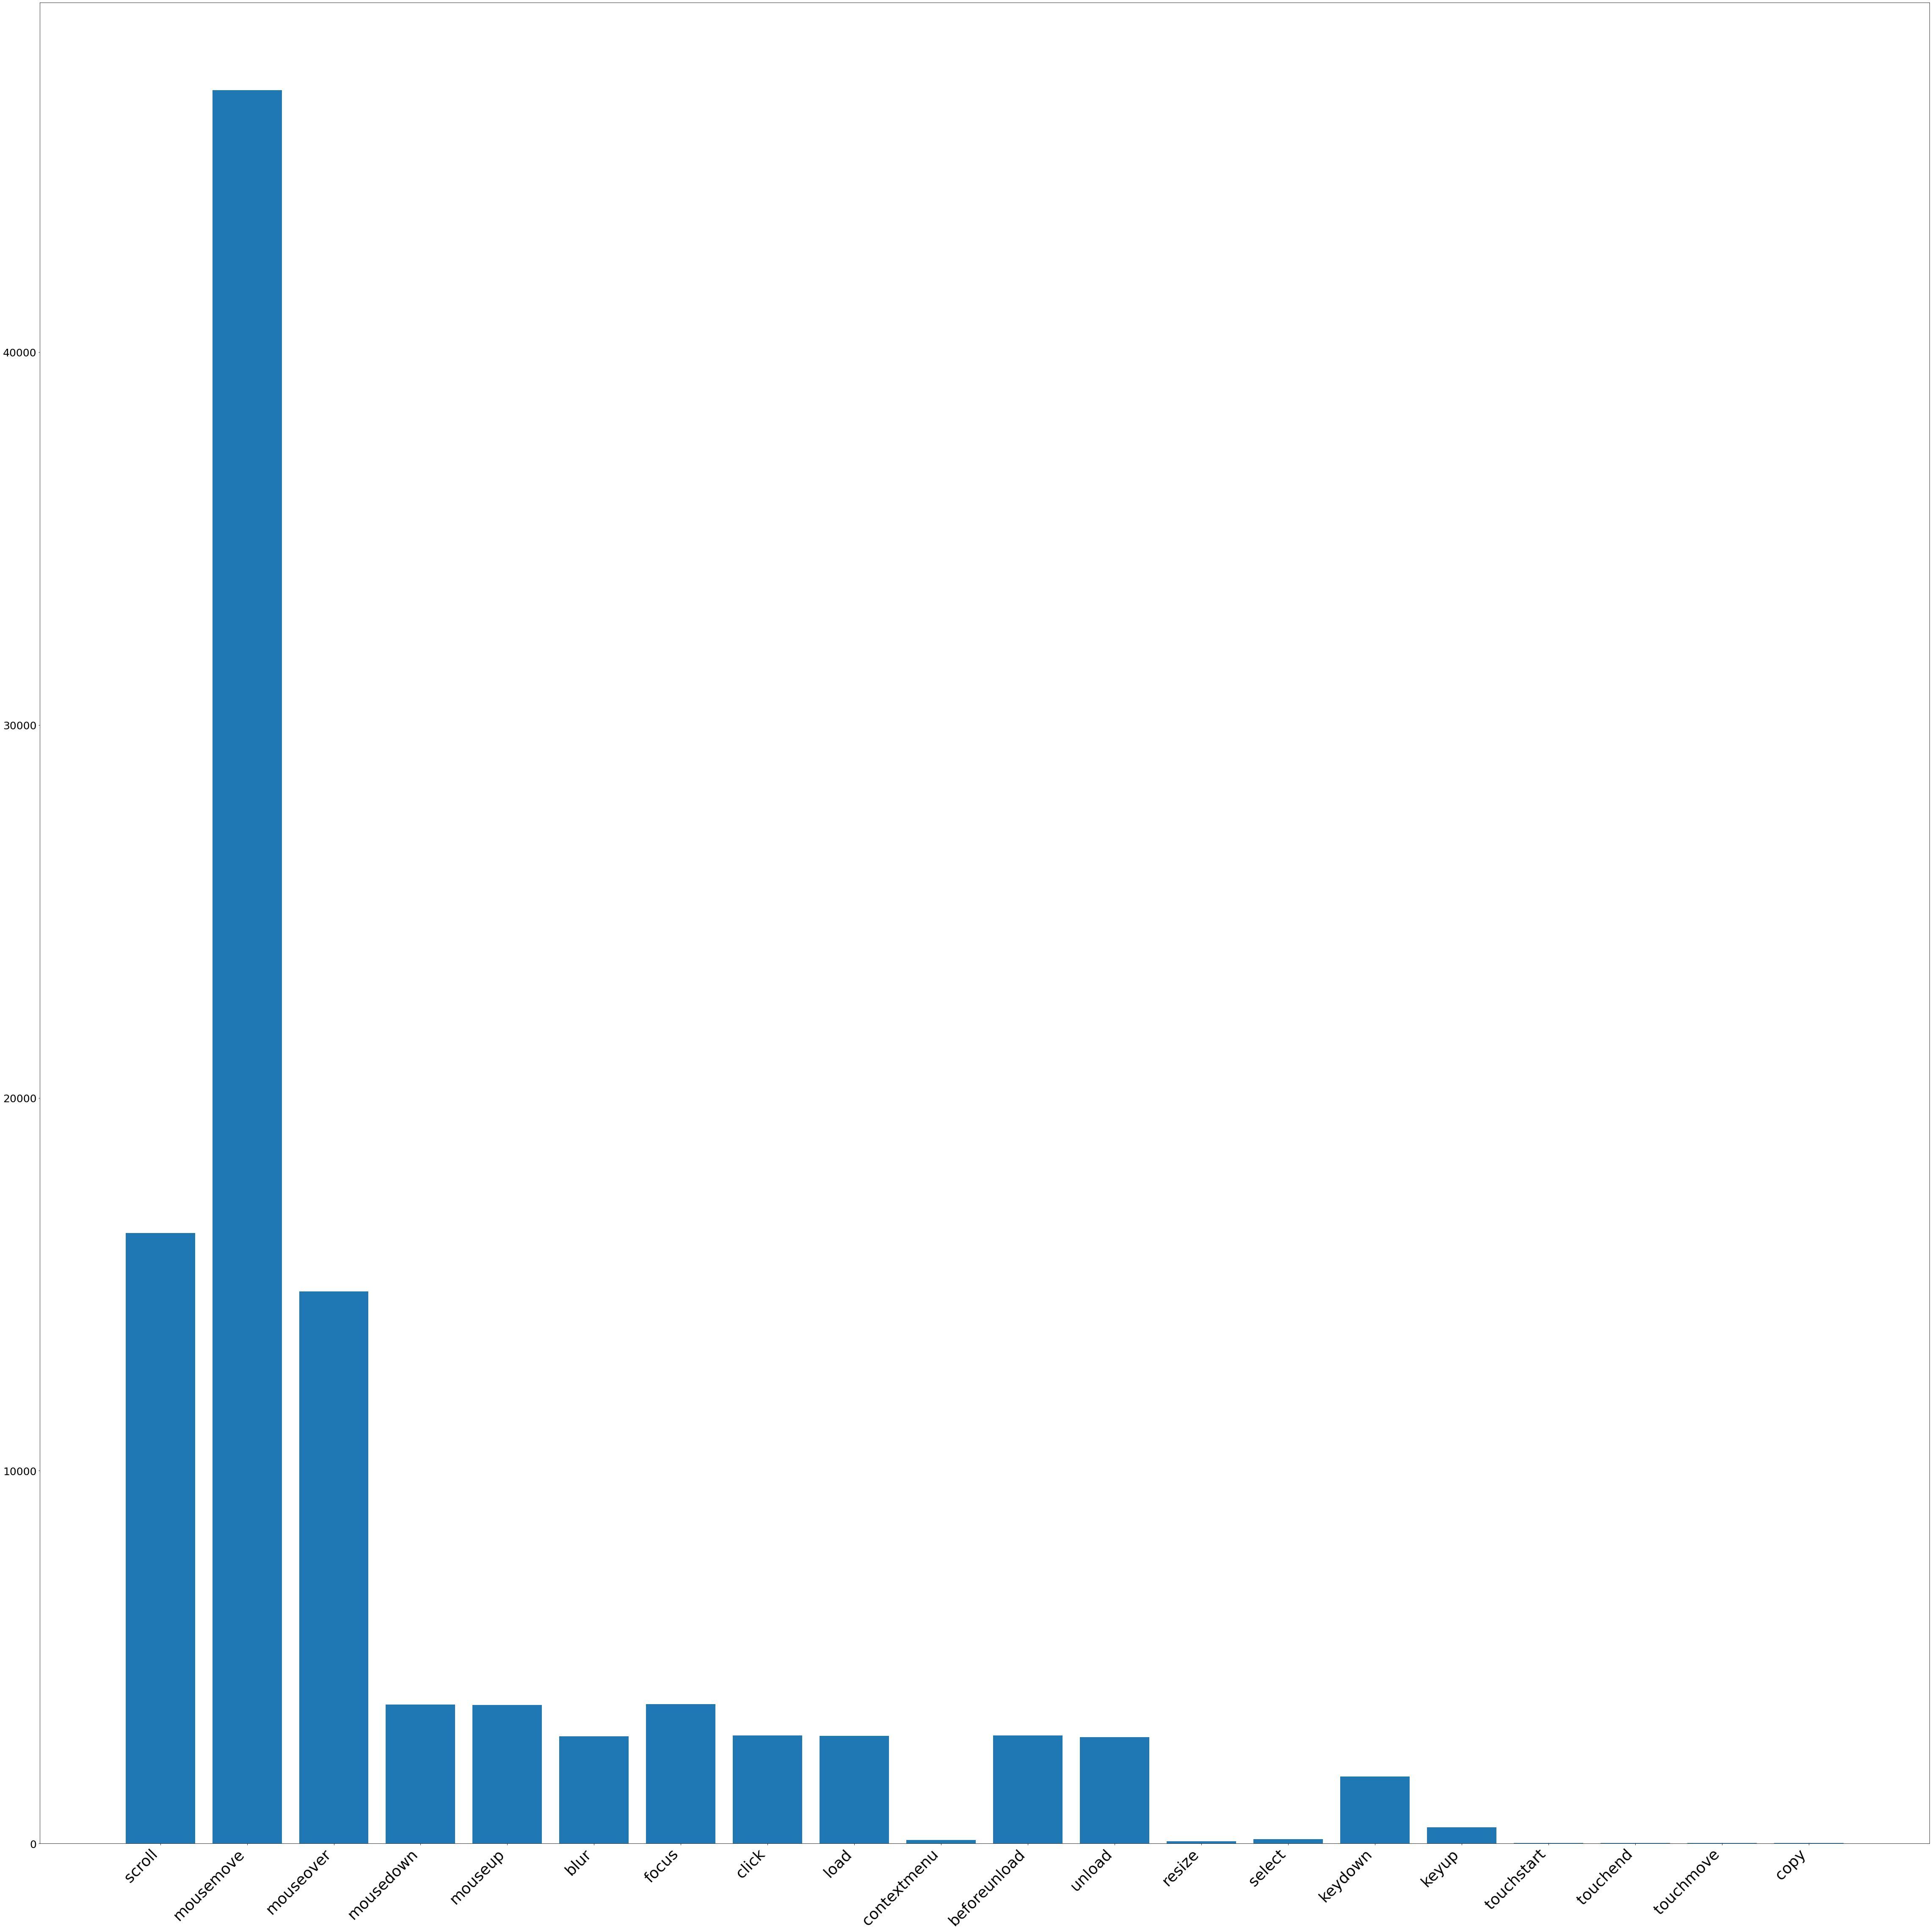

In [19]:
#number of occurencies by inputs
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.bar(counting.keys(), counting)
# plt.savefig('./count_inputs.png', bbox_inches='tight')
# plt.show()

In [10]:
#count the average attention score for each amount of input

ratio = []
ratioy = []
tmp = []

def sum (array) :
    tmp = 0
    for num in array :
        tmp += num
    return tmp

for row in range(len(cleandf)) :
    index =  cleandf[row][1].sum()
    if index not in tmp :
        ratio.append([ index,[cleandf[row][0]]])
        tmp.append(index)
    else :
        ratio[tmp.index(index)][1].append(cleandf[row][0])

ratio.sort()
tmp.sort()
for row in range(len(ratio)) :
    ratioy.append(sum(ratio[row][1])/len(ratio[row][1]))
    

print(ratioy)
        

[3.3333333333333335, 4.0, 3.6666666666666665, 3.7142857142857144, 3.7777777777777777, 3.926829268292683, 4.029411764705882, 3.5454545454545454, 3.7611940298507465, 3.779220779220779, 3.6530612244897958, 3.8488372093023258, 3.5925925925925926, 3.45679012345679, 3.6202531645569622, 3.6231884057971016, 4.088235294117647, 3.8292682926829267, 3.4285714285714284, 3.514705882352941, 3.515151515151515, 3.517857142857143, 3.4193548387096775, 3.5306122448979593, 3.90625, 3.4339622641509435, 3.3488372093023258, 3.75, 3.3617021276595747, 3.533333333333333, 3.477272727272727, 3.816326530612245, 3.5476190476190474, 3.4, 3.3255813953488373, 3.638888888888889, 3.2580645161290325, 3.3902439024390243, 3.72972972972973, 3.64, 3.5, 3.576923076923077, 3.0526315789473686, 3.607142857142857, 4.068965517241379, 3.78125, 3.53125, 3.0, 3.2142857142857144, 3.24, 4.0, 3.36, 3.7222222222222223, 2.9473684210526314, 3.6153846153846154, 3.4814814814814814, 4.166666666666667, 3.5, 3.625, 3.8421052631578947, 4.0, 3.416

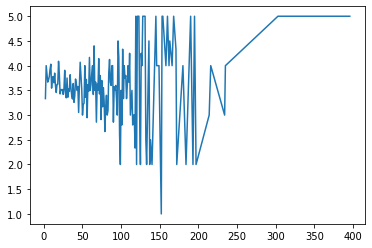

In [11]:
#visualisation of the average score for users with different total amount of inputs
plt.plot(tmp,ratioy)

In [12]:
#heatmap relative to the average

tresholds = []
for input in x :
    tmp = []
    tresholds.append([])
    for i in range(3) :
        tresholds[x.index(input)].append([])
    for row in cleandf :
       if input in row[1].keys() :
           tmp.append(row[1].get(input))

    tmp.sort()
    quarter = np.mean(tmp)/2
    tresholds[x.index(input)][0].append(quarter)
    tresholds[x.index(input)][1].append(quarter*2)
    tresholds[x.index(input)][2].append(quarter*3)
    


def compareToTreshold (treshold, value) :
    if value < treshold[0] :
        return 25
    if value < treshold[1] :
        return 50
    if value < treshold[2] :
        return 75
    return 100

peatdf = []

for row in range(len(cleandf)) :
    cleanrow = {}
    for input in cleandf[row][1].keys() :
        cleanrow[input] = compareToTreshold(tresholds[x.index(input)],cleandf[row][1].get(input))
    peatdf.append([cleandf[row][0],pd.Series(data=cleanrow.values(),index=cleanrow.keys())])

xy = []
x2 = []
y=[25,50,75,100]

for row in peatdf :
    for input in row[1].keys() :
        if input not in x2 :
            x2.append(input)

for i in range(len(x2)) :
    xy.append([])
for i in range(len(y)) :
    for ligne in xy :
        ligne.append([])

for input in x2 :
    for value in y:
        for row in peatdf:
            if input in row[1].keys() and value == row[1].get(input) :
                xy[x2.index(input)][y.index(value)].append(row[0])

for row in xy :
    for case in row :
        tmp = 0
        for num in case :
            tmp += num
        if len(case) > 0 :
            tmp = tmp/len(case)
        else : 
            tmp = 0
        xy[xy.index(row)][row.index(case)] = tmp




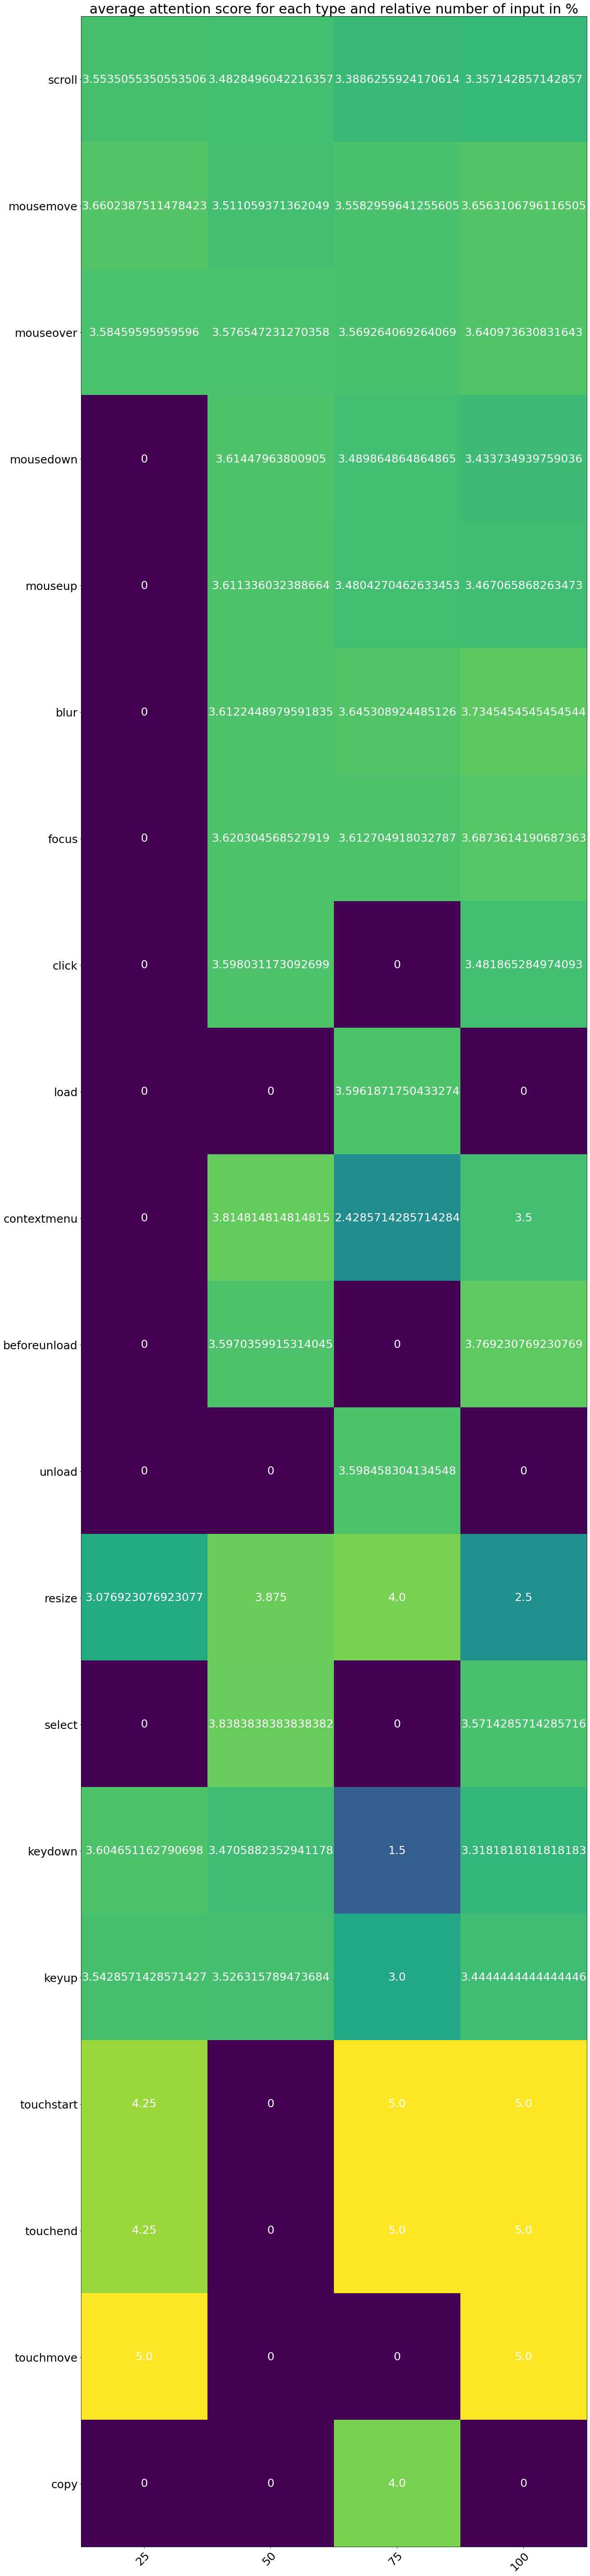

In [13]:
plt.rcParams["figure.figsize"] = (80,80)
plt.rcParams.update({'font.size': 25})

fig, ax = plt.subplots()
im = ax.imshow(xy)

ax.set_xticks(np.arange(len(y)), labels=y)
ax.set_yticks(np.arange(len(x2)), labels=x2)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(x2)):
    for j in range(len(y)):
        text = ax.text(j, i, xy[i][j],
                       ha="center", va="center", color="w")

ax.set_title("average attention score for each type and relative number of input in %")
fig.tight_layout()
plt.show()

In [14]:
#heatmap relative to the position in the array

tmp = []
final_data = []
for input in x :
    tmp.append([])
    final_data.append([])
    for i in range(3) :
        tresholds[x.index(input)].append([])
    for row in cleandf :
       if input in row[1].keys() :
           tmp[x.index(input)].append([row[1].get(input),row[0]])
    tmp[x.index(input)].sort()

for row in tmp :
    for value in range(len(row)) :
        if value < len(row)/4 :
            row[value][0] = 25
        elif value < len(row)/2 :
            row[value][0] = 50
        elif value < len(row)/4*3 :
            row[value][0] = 75
        else :
            row[value][0] = 100

for row in range(len(tmp)) :
    tmp25 = []
    tmp50 = []
    tmp75 = []
    tmp100 = []
    for value in range(len(tmp[row])) :
        if tmp[row][value][0] == 25 :
            tmp25.append(tmp[row][value][1])
        elif tmp[row][value][0] == 50 :
            tmp50.append(tmp[row][value][1])
        elif tmp[row][value][0] == 75 :
            tmp75.append(tmp[row][value][1])
        else :
            tmp100.append(tmp[row][value][1])
    if len(tmp25) < 1 :
        tmp25.append(0)
    if len(tmp50) < 1 :
        tmp50.append(0)
    if len(tmp75) < 1 :
        tmp75.append(0)
    if len(tmp100) < 1 :
        tmp100.append(0)
    final_data[row] = [mean(tmp25),mean(tmp50),mean(tmp75),mean(tmp100)]


  

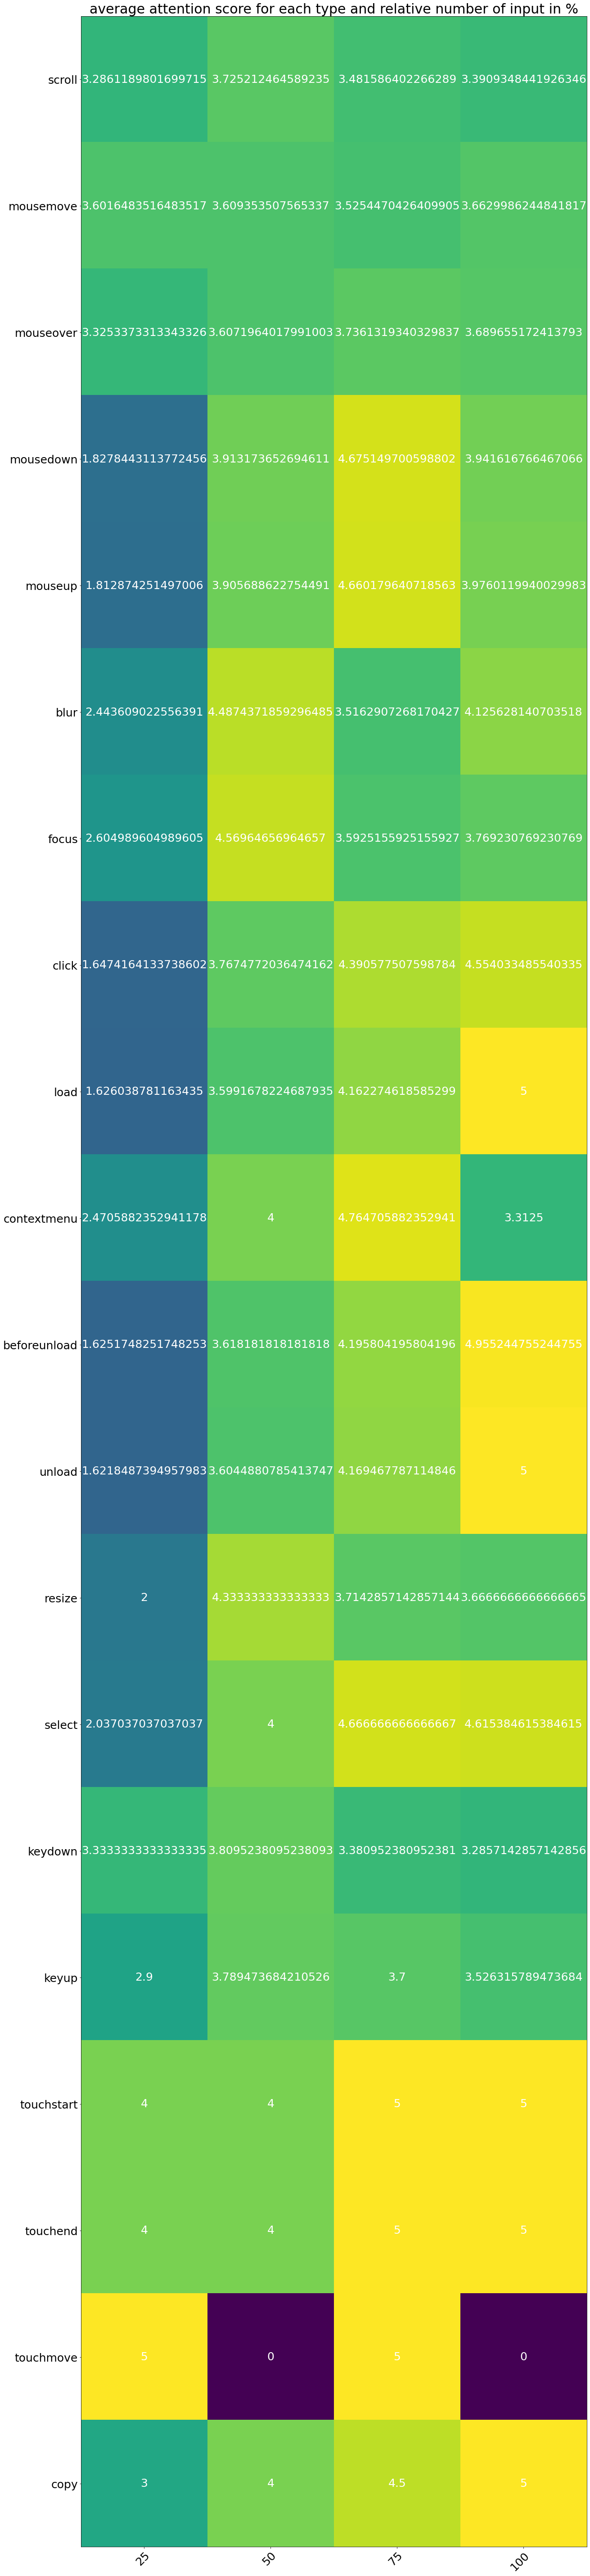

In [15]:
plt.rcParams["figure.figsize"] = (80,80)
plt.rcParams.update({'font.size': 25})

fig, ax = plt.subplots()
im = ax.imshow(final_data)

ax.set_xticks(np.arange(len(y)), labels=y)
ax.set_yticks(np.arange(len(x2)), labels=x2)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(x2)):
    for j in range(len(y)):
        text = ax.text(j, i, final_data[i][j],
                       ha="center", va="center", color="w")

ax.set_title("average attention score for each type and relative number of input in %")
fig.tight_layout()
plt.show()